In [93]:
from scipy.misc import imsave  
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import random
import time

In [94]:
class Point(object):
    def __init__(self,pos,parent,deepth):
        self.parent=parent #标记父亲节点指针
        self.pos=pos  #当前点的位置
        self.deepth=deepth#当前节点深度

In [95]:
def draw_map(barrier,path=None,expand_point=None):
    
    fig = plt.figure(figsize=(13,13)) 
    plt.scatter(x=[x[0] for x in barrier] ,y=[x[1] for x in barrier],c = 'r',marker = 's') 
    if expand_point!=None:
        plt.scatter(x=[x[0] for x in expand_point] 
                    ,y=[x[1] for x in expand_point],c = 'c',marker = 's') 
    if path!=None:
        plt.scatter(x=[x[0] for x in path] ,y=[x[1] for x in path],c = 'b',marker = 's') 
    plt.gca().invert_yaxis() 
    plt.show() 

In [96]:
def expand_first(open_list,visited,barrier,target):
    point=open_list[0]
    pos=point.pos
    if point.pos==target:
        return True,open_list,visited,point
    else:
        #扩展周围的点
        neighbors = [[pos[0]-1,pos[1]-1],[pos[0]-1,pos[1]],[pos[0]-1,pos[1]+1]
                     ,[pos[0],pos[1]-1],[pos[0],pos[1]+1]
                     ,[pos[0]+1,pos[1]-1],[pos[0]+1,pos[1]],[pos[0]+1,pos[1]+1]]

        for neighbor in neighbors:
            if neighbor[0]>=0 and neighbor[1]>=0 and neighbor[0]<=99 and neighbor[1]<=99 and neighbor not in visited and neighbor not in barrier:
                visited.append(neighbor)
                neighbor_point=Point(neighbor,point,point.deepth+1)
                open_list.append(neighbor_point)
        return False,open_list[1:],visited,point
            

In [97]:

map_list=[]

f = open("data/0.55.txt", "r")
#将地图数据读进map中
for i in range(100):
    line=f.readline()
    row=list(line)#转化为数组
    row.pop()#去除尾部换行符
    map_list.append(row)
#print(map_list)
f.close()

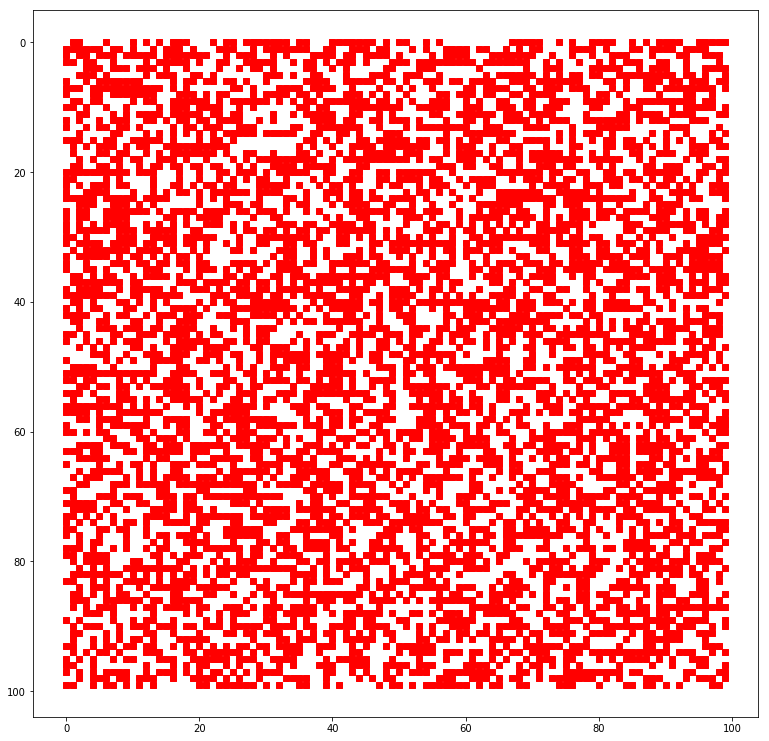

In [98]:
barrier=[]
empty=[]
for index_x in range(100):
    for index_y in range(100):
        if map_list[index_x][index_y]=='1':
            barrier.append([index_y,index_x])
        if map_list[index_x][index_y]=='0':
            empty.append([index_y,index_x])
draw_map(barrier)

In [99]:
def shortest_path(start,target,barrier,draw=True,print_path=True):
    path=[]
    visited=[]
    expand_point=[]
    open_list=[]
    closed_list=[]
    if start in barrier or target in barrier:
        print('No Path')
    else:
        point = Point(start,None,0)
        open_list.append(point)
        visited.append(start)
        while len(open_list):
            istarget,open_list,visited,target_point=expand_first(open_list,visited,barrier,target)
            if istarget==True:
                while target_point.parent!=None:
                    path.append(target_point.pos)
                    target_point=target_point.parent
                path.append(start)
                path.reverse()
                if print_path:
                    print(path)
                break;
        if len(open_list)==0:
            print('No Path')
        if draw:
            draw_map(barrier,path,visited)

[[4, 0], [5, 0], [6, 1], [7, 0], [8, 0], [9, 1], [8, 2], [9, 3], [10, 4], [11, 5], [12, 6], [13, 5], [14, 6], [15, 7], [14, 8], [14, 9], [13, 10], [12, 10], [11, 10], [10, 11], [10, 12], [10, 13], [9, 14], [9, 15], [10, 16], [10, 17], [9, 18], [9, 19], [10, 20], [9, 21], [10, 22], [11, 23], [11, 24], [12, 25], [13, 26], [12, 27], [11, 28], [11, 29], [11, 30], [11, 31], [10, 32], [9, 33], [10, 34], [10, 35], [11, 36], [12, 37], [13, 37], [14, 37], [15, 37], [16, 37], [17, 38], [18, 39], [19, 40], [20, 41], [21, 42], [22, 42], [23, 43], [24, 44], [25, 45], [26, 46], [27, 47], [28, 46], [28, 45], [28, 44], [29, 43], [30, 43], [31, 43], [32, 42], [33, 43], [34, 42], [35, 41], [36, 42], [37, 42], [38, 43], [39, 44], [40, 44], [41, 45], [42, 45], [43, 46], [43, 47], [43, 48], [42, 49], [43, 50], [44, 51], [44, 52], [45, 53], [46, 54], [47, 55], [46, 56], [45, 56], [44, 57], [45, 58], [45, 59], [46, 60], [47, 61], [47, 62], [48, 63], [49, 64], [50, 65], [49, 66], [49, 67], [50, 68], [51, 69],

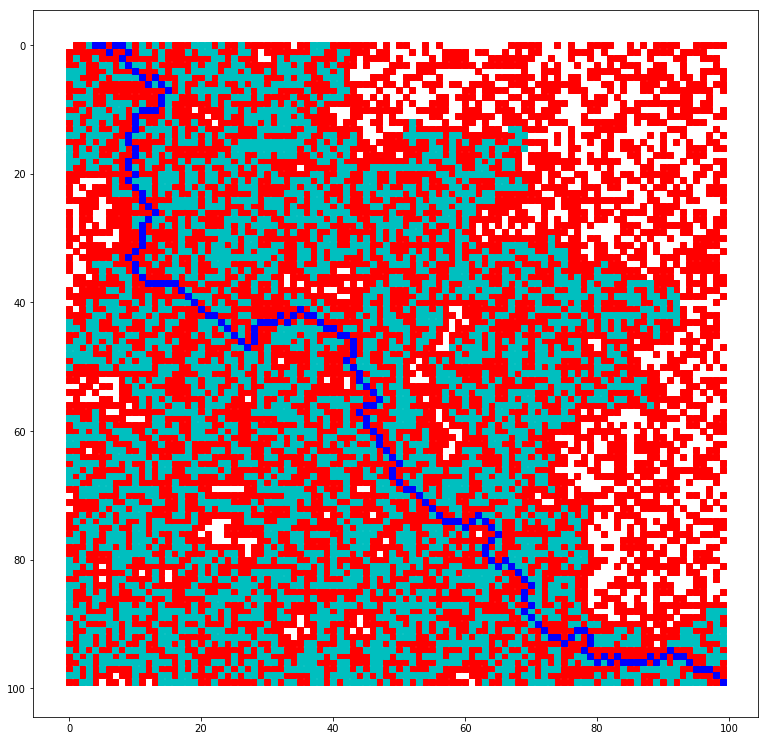

In [100]:
#测试用例
start=[4,0]
target=[99,99]
shortest_path(start,target,barrier,True)

In [101]:
#批量生成随机值测试，时间评估
#为了精确测量，我们测量多次求其平均值
time_list=[]
cost_coefficient=[]
for i in range(10):
    index_start=random.randint(0,len(empty))#只从空白的点选取开始和结束点
    index_target=random.randint(0,len(empty))

    start=empty[index_start]
    target=empty[index_target]
    print(start,end='')
    print(target)
    time_start=time.clock()
    shortest_path(start,target,barrier,False,False)  #画图等I/O操作相当耗费时间，不应计算在时间内,设为false
    time_end=time.clock()
    time_list.append(time_end-time_start)
time_avg=sum(time_list)/len(time_list)
print('time_avg: ',end='')
print(time_avg)



[65, 21][65, 95]
[80, 57][17, 56]
No Path
[66, 83][51, 77]
[1, 33][33, 36]
No Path
[30, 33][21, 0]
[95, 68][0, 94]
[53, 11][83, 52]
[8, 95][51, 87]
[52, 65][97, 71]
[75, 61][10, 50]
time_avg: 1.8111059088813364
